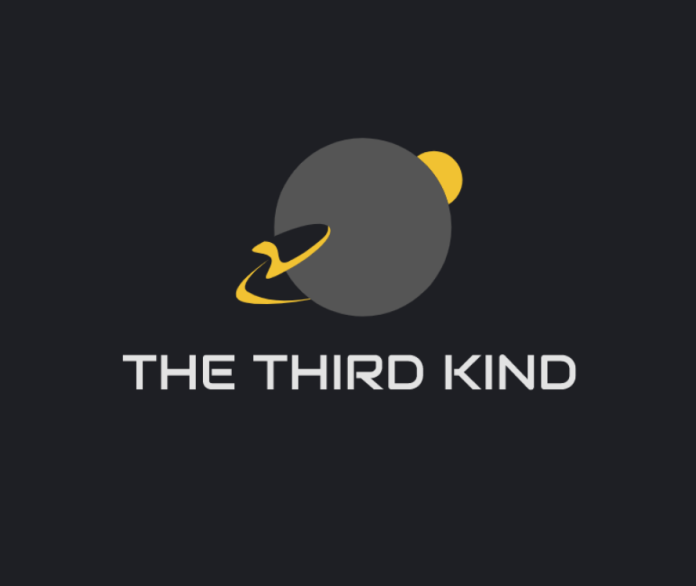

# Welcome Alice!

Let's start your journey! Read the challenge descriptions and follow the instructions in each **task** to finish the challenge. Be sure to complete the **task** in the marked area! You can check if you completed all the **tasks** successfully by checking if the **tests** run successfully. Passing a **test** means that you have completed the challenge successfully! 

Now, let's start with...



<h1>Quantum Teleportation</h1>

In this challenge, you will create a quantum teleportation circuit. First, complete the setup in the code block below. You will only need to do this once! If done correctly, we can use this to prove that the message has arrived from Bob's spaceship!

In [ ]:
# Setup
# Uncomment if you don't have these installed!
# %pip install qiskit
# %pip install pylatexenc
# %pip install ibm_quantum_widgets

In [ ]:
import numpy as np

from pylatexenc import *
from ibm_quantum_widgets import *
from numpy.random import randint

from qiskit import *
from qiskit.visualization import *
from qiskit.result import marginal_counts
from qiskit.quantum_info import Operator
from qiskit.tools.jupyter import *
from qiskit.providers.aer import QasmSimulator
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector,  array_to_latex
from qiskit.quantum_info import Statevector

In [ ]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr,cr)

In [ ]:
# TASK:
# Initialise qubit 0 to |1>

# Enter your code below this line

# Enter your code above this line

qc.initialize(initial_state,0)
qc.draw(output='mpl')

In [ ]:
# TASK:
# Create a Bell state between qubits 1 and 2

# Enter your code below this line

# Enter your code above this line

qc.draw(output='mpl')

In [ ]:
qc.barrier()

# TASK:
# Establish the teleportation protocol between qubits 0 and 1.
# This involves creating a controlled not gate between qubits 0 and 1,
# followed by a Hadamard gate on qubit 0.

# Enter your code below this line

# Enter your code above this line

qc.draw(output='mpl')

In [ ]:
qc.barrier()

# TASK:
# Measure qubits 0 and 1

# Enter your code below this line

# Enter your code above this line

qc.draw(output='mpl')

In [ ]:
# Decoding

qc.barrier()

# TASK:
# Now, let us decode the message!
# If qubit 0 is in state |1>, apply a Z gate on qubit 2.
# If qubit 1 is in state |1>, apply a X gate on qubit 2.

# Enter your code below this line

# Enter your code above this line

qc.draw(output='mpl')

In [ ]:
# TASK:
# Measure qubit 2

# Enter your code below this line

# Enter your code above this line

qc.draw(output='mpl')

In [ ]:
backend=Aer.get_backend('qasm_simulator')
outputs=execute(qc,backend,shots=1000).result()
results=outputs.get_counts()
plot_histogram(results)

In [ ]:
sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, sim)
counts = sim.run(t_qc).result().get_counts()
# Showing only second qubit as result
qubit_counts = [marginal_counts(counts, [qubit]) for qubit in range(2,3)]

# TEST!
assert qubit_counts[0]["1"] == 1024, "Your circuit is incorrect!"

plot_histogram(qubit_counts)

print("The signal originated from Bob's ship!")

Great job! However, just because we know that the message came from Bob's spaceship $\gamma$ does not mean that the message came from Bob himself! After all, Eve is a very cunning enemy. To prove that it really is Bob, we need the next algorithm, which is...

<h1>Bernstein-Vazirani Algorithm</h1>

All of the commanders have their own secret code, and we will now use the Bernstein-Vazirani algorithm to receive the secret code from $\gamma$. If this matches Bob's secret code, we will know for sure that it is Bob who is contacting us!

In [ ]:
n = 3
circuit = QuantumCircuit(n+1,n)
circuit.x(n) 
circuit.barrier() 
circuit.h(range(n+1)) 
circuit.barrier() 

circuit.cx(1,3)
    
circuit.barrier() 

# Bob has sent you a secret message!

# TASK:
# Apply a Hadamard Gate to all the qubits and then measure qubits 0 through 2 to decode the secret message.

# Enter your code below this line 

# Enter your code above this line

circuit.draw(output='mpl')

In [ ]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
plot_histogram(result.get_counts(circuit))

counts = result.get_counts(circuit)
Signal = str(list(counts)[0])
print(f'The sent signal was {Signal}.')

ids = {"001": "Alice", "010": "Bob", "111": "Charlie", "101": "Danielle", "000": "Ethan", "100": "Freya", "011": "Grace"}

# TEST!
assert ids[Signal] == "Bob", "Your code is incorrect!"

print("The signal was sent by " + ids[Signal] + ".")

<h1> Quantum Key Distribution </h1>

As great as the Bernstein-Vazirani algorithm is, it has its flaws. If Bob sends us a message, Eve can read that message too!

If done correctly, we can create a secret key with which we can encrypt messages, and we can do so over classical channels! If Eve is intercepting our secret key, we will know in advance!



In [ ]:
def encode_message(bits, bases):
  
    message = []
    n = len(bits)
    assert n == len(bases), "Bits and Bases must be the same length!"
    for i in range(n):
        qc = QuantumCircuit(1,1)

        # TASK:
        # Fill in the blanks to create ground and excited states for the given basis

        if bases[i] == 0: # Prepare qubit in Z-basis
            if bits[i] == 0:
                # Prepare the ground state
                # Enter your code below this line 
                
                # Enter your code above this line
            else:
                # Prepare the excited state
                # Enter your code below this line 
                
                # Enter your code above this line
        else: # Prepare qubit in X-basis
            if bits[i] == 0:
               # Prepare the ground state
                # Enter your code below this line 
                
                # Enter your code above this line
            else:
                # Prepare the excited state
                # Enter your code below this line 
                
                # Enter your code above this line
        qc.barrier()
        message.append(qc)
    return message
for message in encode_message([0,1,0,1], [0,0,1,1]):
  message.draw(output = 'mpl')

In [ ]:
def measure_message(message, bases): 
  
    backend = Aer.get_backend('aer_simulator')
    measurements = []
    n = len(bases)
    assert n == len(message), "Message and bases must be the same size!"
    for q in range(n):

        # TASK:
        # Measure the qth message in the qth basis.

        if bases[q] == 0: 
            # Measuring in the Z-basis.
            # Enter your code below this line 
            
            # Enter your code above this line
        if bases[q] == 1: 
            # Measuring in the X-basis.
            # Enter your code below this line 
            
            # Enter your code above this line
        aer_sim = Aer.get_backend('aer_simulator')
        qobj = assemble(message[q], shots=1, memory=True)
        result = aer_sim.run(qobj).result()
        measured_bit = int(result.get_memory()[0])
        measurements.append(measured_bit)
    return measurements

In [ ]:
# TEST!
bits = randint(2, size=10) 
bases = randint(2, size=10) 
assert np.array_equal(measure_message(encode_message(bits, bases), bases),bits), "Your code is incorrect!"

Did the tests succeed? Great! Now, watch how we can use this to create a secret key between you and Bob!

In [ ]:
def remove_garbage(a_bases, b_bases, bits):
  
    good_bits = []
    for q in range(n):
        if a_bases[q] == b_bases[q]:
            # If both used the same basis, add
            # this to the list of 'good' bits
            good_bits.append(bits[q])
    return good_bits

In [ ]:
def sample_bits(bits, selection):
  
    sample = []
    for i in selection:
        # use np.mod to make sure the
        # bit we sample is always in 
        # the list range
        i = np.mod(i, len(bits))
        # pop(i) removes the element of the
        # list at index 'i'
        sample.append(bits.pop(i))
    return sample

In [ ]:
np.random.seed(seed=376)
n = 100 # Length of our initial message
alice_bits = randint(2, size=n) # Intruder Eve does not know alice_bits
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)

# Now we send the message to Bob
bob_bases = randint(2, size=n)
bob_results = measure_message(message, bob_bases) # Intruder Eve does not know bob_results

# Now Alice and Bob share their respective bases
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits) # Eve can only know 2 of the 3, hence she can never know alice_key
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)  # Eve can only know 2 of the 3, hence she can never know bob_key

# Now we test to see if this worked properly
sample_size = 15
bit_selection = randint(n, size=sample_size)

bob_sample = sample_bits(bob_key, bit_selection)
alice_sample = sample_bits(alice_key, bit_selection)

if bob_sample == alice_sample:
  print("Keys distributed successfully")
else:
  print("Key distribution unsuccessful! Eve is intercepting your messages!")

Great! Eve is not eavesdropping on your conversation so far.

We can now use this to communicate securely with Bob!

Wait, what's this!

Bob has found a habitable planet!

<h1> Grover's algorithm </h1>

We have a large, unstructured database of possible habitable exoplanets. Now, we can use Grover's algorithm to search for the planet. Doing so provides us with a quadratic speedup over the classical method!

In [ ]:
def phase_oracle(N, i, name = 'Oracle'):
    
    qc = QuantumCircuit(N, name=name)
    oracle_matrix = np.identity(2**N)
    
    for i in i:
        oracle_matrix[i, i] = -1
        
    qc.unitary(Operator(oracle_matrix), range(N))
    
    return qc

In [ ]:
def diffuser(N):
  
    qc = QuantumCircuit(N, name='Diffuser')
    # TASK:
    # Apply a Hadamard Gate to N-qubits

    # Enter your code below this line
    
    # Enter your code above this line

    qc.append(phase_oracle(N, [0]), range(N))

    # TASK:
    # Apply a Hadamard Gate to N-qubits
    # Enter your code below this line
    
    # Enter your code above this line
        
    return qc

In [ ]:
def Grover(N, j):
    
    qc = QuantumCircuit(N, N)
    r = int(np.floor(np.pi/4*np.sqrt(2**N/len(j))))    
    print(f'{r} rounds to get the index of the habitable planet')

    # TASK:
    # Apply a Hadamard Gate to N-qubits

    # Enter your code below this line
    
    # Enter your code above this line
    
    for _ in range(r):
        qc.append(phase_oracle(N, j), range(N))
        qc.append(diffuser(N), range(N))

    # TASK:
    # Measure the N-qubits and store the result in N classical bits
    
    # Enter your code below this line
    
    # Enter your code above this line
    
    return qc

In [ ]:
N = 3
G_ship = int(str(Signal[0]) ,2)
mycircuit = Grover(N, [G_ship])
mycircuit.draw(output='mpl')

In [ ]:
from qiskit import Aer, execute
simulator = Aer.get_backend('qasm_simulator')
mycounts = execute(mycircuit, backend=simulator, shots=1024).result().get_counts(mycircuit)

H_Planets = {'000':'Kepler-283 c' , '001':'Kepler-438 b' , '010':'Kepler-62 e' , '011':'Gliese 667C c' , '100':'Kepler-442 b' , '101':'Kepler-296 e' , '110':'Kepler-452 b' , '111':'Gliese 832 c' }

plot_histogram(mycounts)

In [ ]:
mycounts_keys = list(mycounts.keys())
mycounts_values = list(mycounts.values())
prob = mycounts_values.index(max(mycounts_values))

Planet_index = mycounts_keys[prob]
assert Planet_index == "000", "Your code is incorrect!"

Planet_name = H_Planets.get(Planet_index)
print('The habitable planet that Bob has discovered is',Planet_name + '.')

Congratulations! Well done! We have found a habitable planet!

With this, your journey comes to an end! You can return to your cryosleep, as I, Hal, your AI companion through this journey take you to your new home!

<h1>Bonus Challenge!</h1>

Alice's journey may have come to an end, but your quantum journey is just starting! 

Did you like solving these challenges? If so, here is a **Bonus Challenge** for you!

Do you still remember the **quantum teleportation** circuit? What about the **encryption** and **decryption**? What if I told you we can combine the two?

This is what you will be doing in this challenge! Fair warning: this is a lot harder than the last ones. But the reward is just that much sweeter!

Now, onwards!

For this challenge, we will use the following encoding. Of course, we can use any encoding we want, as long as both the sender and receiver know it. We will then use this encoding to teleport **two** qubits. 

Are you ready?

| Qubit $1$ | Qubit $2$ | &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Result &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; |
| :-: | :-: | :-: |
| $0$ | $0$ | $\tfrac 1{\sqrt 2}\left(-\mid 00\rangle-\mid 10\rangle\right)$ |
| $0$ | $1$ | $\tfrac 1{\sqrt 2}\left(-\mid 01\rangle-\mid 11\rangle\right)$ |
| $1$ | $0$ | $\tfrac 1{\sqrt 2}\left(-\mid 00\rangle-\mid 10\rangle\right)$ |
| $1$ | $1$ | $\tfrac 1{\sqrt 2}\left(-\mid 01\rangle-\mid 11\rangle\right)$ |

In [ ]:
# Initializing Quantum Circuit
qc = QuantumCircuit(6,6) # Defining 6 quantum register and 6 classical registers for our purpose

# TASK: 
# Setting Input |11>

# Enter your code below this line

# Enter your code above this line

qc.barrier()

# Drawing our Input Circuit
qc.draw(output='mpl')

As per the encoding mentioned in the data sheet, the encoding required is $(XZXH|q0\rangle)(|q1\rangle)$

There is a catch, as for the state where the $q0$ is $|1\rangle$, there should be a phase change.

So, for cases where $q0$ is $|1\rangle$, we will invert it before applying the encoding.

In [ ]:
# Encoding the data

qc.measure(0,0) # To know the status of |q0>

qc.x(0).c_if(0,1) # Phase correction

# TASK:
# Apply the XZXH encoding to qubit 0

# Enter your code below this line

# Enter your code above this line

qc.barrier()
qc.draw(output='mpl')

In [ ]:
# Teleporting Protocol

# Entagling qubits to be sent i.e |q2> with |q4> and |q3> with |q5>

# TASK:
# Entangle q2 with q4

# Enter your code below this line

# Enter your code above this line

# TASK:
# Entangle q3 with q5

# Enter your code below this line

# Enter your code above this line

qc.barrier()
qc.draw(output='mpl')

In [ ]:
# Bell measurement on the information to be teleported

# TASK:
# Establish the teleportation protocol between qubits 0 and 2.
# If you have forgotten, you can scroll to the teleportation section to check it out!

# Enter your code below this line

# Enter your code above this line


# TASK:
# Establish the teleportation protocol between qubits 1 and 3.

# Enter your code below this line

# Enter your code above this line

qc.barrier()
qc.draw(output='mpl')

In [ ]:
# Completing the protocol by measurement to send to other end using cx and cz gate

# TASK:
# Teleport |q0> to |q4> using |q2>
# We can this by applying a controlled not gate between qubits 2 and 4,
# followed by a controlled z gate between qubits 0 and 4.

# Enter your code below this line

# Enter your code above this line

# TASK:
# Teleport |q1> to |q5> using |q3>
# Use the hint above if you are struggling with this

# Enter your code below this line

# Enter your code above this line

qc.barrier()
qc.draw(output='mpl')

Now as the information is been succesfully teleported, now we will decrypt the information.

This is done by applying the gates in reverse order than that of encryption.

In [ ]:
# Applying the decoding

# TASK:
# Apply the XZXH encoding in reverse order to qubit 4

# Enter your code below this line

# Enter your code above this line

qc.x(4).c_if(0,1) # Phase correction


qc.barrier()

#Now lets measure our state and see its final state

qc.measure([4,5],[4,5])
qc.draw(output='mpl')

In [ ]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator, shots=1024).result()
# TEST!
assert result.get_counts(qc)["110001"] == 1024, "Your code is incorrect!"

print("Well done! You have successfully passed the Bonus Challenge! The teleported message was " + list(result.get_counts(qc).keys())[0][:2] + ".")
plot_histogram(result.get_counts(qc))

Thank you very much for going through our challenges!

Did you have fun? If you are still hungry for more, you can play around with the initialization steps and check how our circuits behave with different initial states! What happens if we teleport $\mid 00\rangle$ in the bonus challenge? What about $\mid 01\rangle$? 

Still interested? You can check how we solved this notebook over [here](https://colab.research.google.com/drive/1PD1N7WQFhTS0uf_n_6IIrsxqwz0qz3Vt?usp=sharing). Have fun comparing answers!

Yours Truly,

Rihab, Rishi and Zuhair

